# Diagnostic Reference Level for Radiopharmaceuticals in NM- INC 

Elaborado por: Andrea Lizeth Lopez Rodriguez.Universidad Nacional de Colombia 

Inicialmente se importan los paquetes de Python que serán empleados en el análisis de los datos

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


##Archivo plano de texto, colocar los datos y los encabezados sin espacios 
#Para cargar los datos
data = pd.read_csv('DRLRF.txt', delim_whitespace =True)

#para ver los primeros datos
data.head()

,RF,EXAM,ActAdm,Actdosi,Vol
0,Tc,MDP,20.0,20.9,0.30
1,Tc,MDP,20.0,20.8,0.35
2,Tc,MDP,20.0,21.0,0.40
3,Tc,MDP,20.0,21.0,0.40
4,Tc,MDP,20.0,22.0,0.40


donde ActAdm -> Actividad Administrada y Actdosi -> Actividad dosificada en mCi. Vol -> Volumen en mL

In [10]:
##lista de tipos de datos por cada columna
data.dtypes

RF          object
EXAM        object
ActAdm     float64
Actdosi    float64
Vol        float64
dtype: object

## Missing Values

Eliminar los valores faltantes a lo largo de las columnas "ActAdm", "Actdosi" y "Vol"

In [11]:
missing_data = data.isnull()
missing_data.head(5)

,RF,EXAM,ActAdm,Actdosi,Vol
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False" means the value is present in the dataset. In the body of the for loop the method ".value_counts()" counts the number of "True" values.

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

RF
False    1013
Name: RF, dtype: int64

EXAM
False    1013
Name: EXAM, dtype: int64

ActAdm
False    1013
Name: ActAdm, dtype: int64

Actdosi
False    1013
Name: Actdosi, dtype: int64

Vol
False    1012
True        1
Name: Vol, dtype: int64



### Deal with missing data
Drop the whole row

In [13]:
# simply drop whole row with NaN in "Vol" column
data.dropna(subset=["Vol"], axis=0, inplace=True)

# reset index, because we droped one row
data.reset_index(drop=True, inplace=True)

## Variables Categóricas

Datos de tecneciados corresponden al mes de Enero de 2019. Datos de FDG corresponden a Enero-27 Junio de 2019. Datos Ga DOTA de Enero-Octubre de 2019. Datos de Ga PSMA de Enero-Octubre de 2019

In [9]:
######Conteo de variables categoricas
data["RF"].value_counts()

F     554
Tc    277
Ga    182
Name: RF, dtype: int64

In [10]:
######Conteo de variables categoricas
data["EXAM"].value_counts()

FDG       554
MDP       118
GADOTA     93
GAPSMA     89
VENTRI     89
FILTRA     36
RENO       16
CENTI      11
ROLLT       4
GPARA       2
DMSA        1
Name: EXAM, dtype: int64

In [11]:
####GROUP BY in Python 
data_test =data[['RF','EXAM']]

In [13]:
data_test.describe()

,RF,EXAM
count,1013,1013
unique,3,11
top,F,FDG
freq,554,554


In [17]:
from scipy import stats

TypeError: unsupported operand type(s) for /: 'str' and 'float'

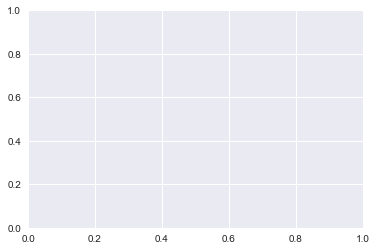

In [18]:
sns.distplot(data['RF'],kde=False,color='b')

Filtrando datos por Radiofarmaco : Tc-99m(Tc), F-18(F), Ga-68 PSMA(GaPSMA) y Ga-68 DOTA(GaDOTA). Falta los estudios de Yodo 

In [4]:
######################################### Tc-99m ##############################################
Tecnecio = ['Tc']
data_Tc =data[data.RF.isin(Tecnecio)]
#data_Tc.shape

############# MDP-OSEA #############


############# Pyros-Ventriculografía #############


############# Filtración Glomerular #############


############# Renograma #############



############# Centinela #############



############# Roll #############



############# Gástrico #############


In [5]:
######Conteo de variables categoricas
data["Genero"].value_counts()

,RF,EXAM,ActAdm,Actdosi,Vol
0,Tc,MDP,20.00,20.90,0.30
1,Tc,MDP,20.00,20.80,0.35
2,Tc,MDP,20.00,21.00,0.40
3,Tc,MDP,20.00,21.00,0.40
4,Tc,MDP,20.00,22.00,0.40
5,Tc,MDP,20.00,23.70,0.40
6,Tc,MDP,20.00,25.40,1.10
7,Tc,VENTRI,20.00,23.80,0.20
8,Tc,VENTRI,20.00,23.50,0.20
9,Tc,VENTRI,20.00,24.40,0.25


In [ ]:
######################################### F-18 ##############################################
Fluor = ['F']
data_F =data[data.RF.isin(Fluor)]
#data_F.shape

In [ ]:
######################################### Ga-68 PSMA ##############################################
GalioP = ['GaPSMA']
data_GP =data[data.RF.isin(GalioP)]
#data_GP.shape

In [ ]:
######################################### Ga-68 DOTA ##############################################
GalioD = ['GaDOTA']
data_GD =data[data.RF.isin(GalioD)]
#data_GD.shape